An experiment is a proceedure to test whether one or multiple variations of the status quo deliver superior results.

We generally proceed in the following ways:

1. Define the problem (e.g. improve search experience)
2. Design solution (e.g. new landing page for dead searches)
3. Define outcome metric to be improved (e.g. number of dead searches)
4. Define target population and smapling approach
5. Specify hypothesis
6. Conduct power calculations
7. Randomise units into groups
8. Run experiment
9. Analyse results
10. Communicate results

# Randomisation

- Level of randomisation
- Simple randomisation
- Stratified randomisation

### Randomisation functions

In [107]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy.stats import norm, bernoulli, uniform

In [158]:
# Creating a testing dataset

np.random.seed(231286)
n = 100
cities = ['London', 'Manchester', 'Birmingham']
data = {
    'ids': np.arange(n),
    'age': norm.rvs(45, 20, n).astype('int'),
    'female': np.random.randint(0, 2, n),
    'city': np.random.choice(cities, n)
}
df = pd.DataFrame(data)
df.head(10)

,ids,age,female,city
0,0,55,0,Manchester
1,1,50,0,Manchester
2,2,53,1,Manchester
3,3,61,1,Birmingham
4,4,58,1,Manchester
5,5,39,1,Birmingham
6,6,31,1,London
7,7,50,0,London
8,8,40,0,Manchester
9,9,28,1,Manchester


In [163]:
# Create routines for simple and blocked randomisation

def simple_rand(df, n_groups):
    
    # Randomly sort df rows
    df = df.sample(frac=1).reset_index(drop=True)
    
    # Allocate to groups
    df['group'] = np.ceil(n_groups * (df.index+1) / len(df)).astype('int')
    
    return df

def blocked_rand(df, n_groups, block_vars):
    
    return (
        df.groupby(block_vars)
        .apply(simple_rand, n_groups)
        .reset_index(drop=True)
    )

blocked_rand(df, 3, ['city', 'female']).head()

,ids,age,female,city,group
0,33,22,0,Birmingham,1
1,20,12,0,Birmingham,1
2,46,47,0,Birmingham,1
3,73,21,0,Birmingham,1
4,34,38,0,Birmingham,2


In [154]:
np.random.random_sample?

# Misc

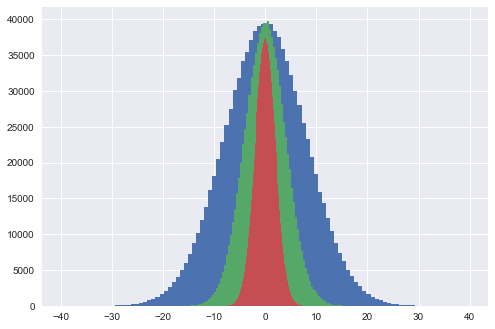

In [110]:
# Generating normal random numbers

n = int(1e6)
bins = 100
plt.hist(norm.rvs(0, 8, n), bins=bins)
plt.hist(norm.rvs(0, 4, n), bins=bins)
plt.hist(norm.rvs(0, 2, n), bins=bins);